<a href="https://colab.research.google.com/github/tharaka-ec21028/my-colab-work/blob/main/assignement_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Problem 01: Predicting House Prices*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [5]:
X = np.array([500, 750, 1000, 1250, 1500]).reshape(-1, 1)
y = np.array([150,200,250,275,300])

1.Fit a simple linear regression model to predict house price based on house size.

In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

2.Find the slope and intercept of the line.

In [7]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 0.15000000000000002
Intercept: 84.99999999999997


3.Predict the price for a 1,100 sqft house.



In [16]:
pre_1100 = model.predict([[1100]])
print(f"{pre_1100[0]:4f}")

250.000000


4.Plot the data points and the regression line

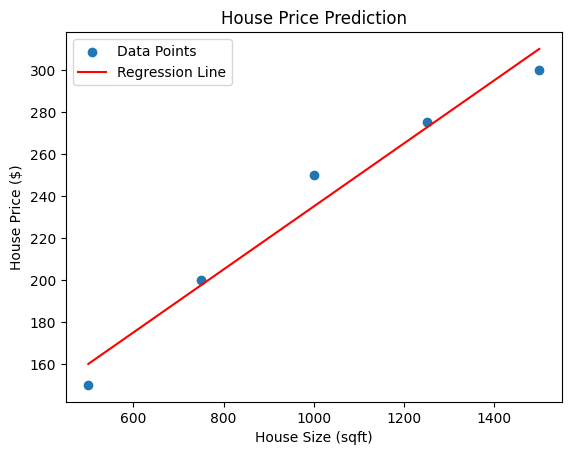

In [17]:
plt.scatter(X, y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('House Size (sqft)')
plt.ylabel('House Price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.show()

5.Compute the Mean Squared Error (MSE) of the model.

In [19]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 87.5


### *Problem 02: Predicting Student Exam Scores*

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

1.Use multiple linear regression to build a model that predicts exam scores using all three input features.

In [23]:
data = {
    'Hours Studied': [10, 12, 8, 15, 7],
    'Attendance (%)': [80, 90, 60, 95, 70],
    'Sleep Hours': [6, 7, 5, 8, 5],
    'Exam Score (%)': [70, 85, 60, 95, 65]
}

df = pd.DataFrame(data)

X = df[['Hours Studied', 'Attendance (%)', 'Sleep Hours']]
y = df['Exam Score (%)']

In [24]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

2.Display the coefficients of the regression model.


In [25]:
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [-10.27777778  -0.61111111  42.5       ]
Intercept: -33.33333333333343


3.Predict the exam score for a student who studied 11 hours, had 85% attendance, and slept 7 hours.

In [26]:
new_student = [[11, 85, 7]]
pred_score = model.predict(new_student)
print(f"Predicted exam score: {pred_score[0]:.2f}%")

Predicted exam score: 99.17%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4.Compute the R^2 score of the model.

In [27]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2 score: {r2:.3f}")

R^2 score: 0.998


### The coefficients show how much each variable contributes to the prediction. A higher coefficient (absolute value) means greater influence. However, with a small dataset, statistical significance is limited. All features seem to contribute, but more data is needed for robust conclusions.

......................................................................................................................................................................................................................................

# *Problem 03: Classifying Fruit Type*

In [28]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
data = {
    'Weight (g)': [150, 170, 140, 130, 120, 110],
    'Color Score': [7, 6, 8, 3, 2, 4],
    'Fruit Type': ['Apple', 'Apple', 'Apple', 'Orange', 'Orange', 'Orange']
}
df = pd.DataFrame(data)
X = df[['Weight (g)', 'Color Score']]
y = df['Fruit Type']

1.Build a KNN classifier to classify fruits based on weight and colour score (use


In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

2.Predict the class for a fruit with weight 135 g and colour score 5.



In [31]:
new_fruit = [[135, 5]]
pred = knn.predict(new_fruit)
print(f"Predicted class: {pred[0]}")

Predicted class: Apple


3.Visualize the decision boundary (optional: use matplotlib for a 2D plot).



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


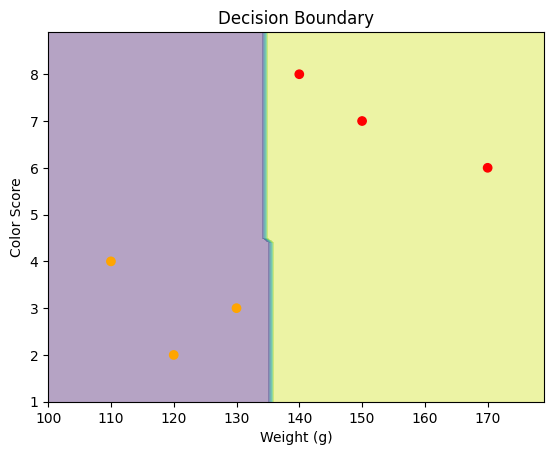

In [32]:
# This step requires more code, but here's a simple example:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X.iloc[:, 0].min() - 10, X.iloc[:, 0].max() + 10
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(np.array(Z) == 'Apple', 1, 0).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=np.where(y == 'Apple', 'red', 'orange'))
    plt.xlabel('Weight (g)')
    plt.ylabel('Color Score')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, knn)

4.Try different values of
k (e.g., 1,5) and observe how predictions change.

In [33]:
for k in [1, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    pred_k = knn.predict(new_fruit)
    print(f"k={k}: Predicted class: {pred_k[0]}")

k=1: Predicted class: Orange
k=5: Predicted class: Orange


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### As k increases, the model becomes smoother and less sensitive to noise but may underfit. Smaller k captures local patterns but is more sensitive to outliers. Feature scaling (e.g., using StandardScaler) is important in KNN because features with larger ranges will dominate the distance calculation, so standardizing ensures all features are equally important.